In [36]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 一元线性回归，底层建模

In [9]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
w = Variable(torch.rand(1),requires_grad=True)
b = Variable(torch.zeros(1),requires_grad=True)

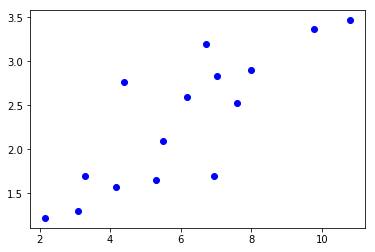

In [10]:
plt.plot(x_train,y_train,"bo")

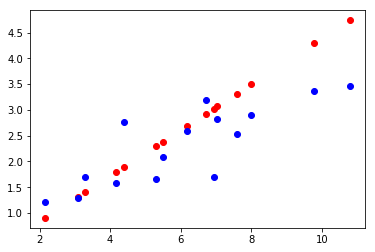

In [18]:
def liner_regression(x):
    y = w*x+b
    return y
y_pre = liner_regression(x_train)
plt.plot(x_train.data.numpy(),y_pre.data.numpy(),"ro")
plt.plot(x_train.data.numpy(),y_train.data.numpy(),"bo")

In [19]:
def loss_fun(y_train,y_pre):
    return torch.mean((y_train-y_pre)**2)
loss = loss_fun(y_train,y_pre)
print(loss)

tensor(0.4558, grad_fn=<MeanBackward0>)


In [20]:
loss.backward()
print(w.grad,b.grad)
w.data = w.data - 1e-3*w.grad
b.data = b.data - 1e-3*b.grad
w.grad.zero_()
b.grad.zero_()

tensor([5.8410]) tensor([0.6254])


tensor([0.])

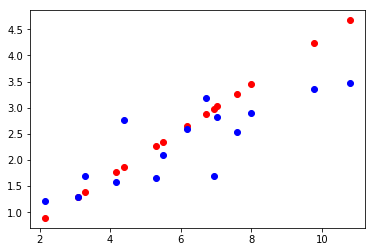

In [21]:
y_pre = liner_regression(x_train)
plt.plot(x_train.data.numpy(),y_pre.data.numpy(),"ro")
plt.plot(x_train.data.numpy(),y_train.data.numpy(),"bo")

In [22]:
loss = loss_fun(y_train,y_pre)
print(loss)

tensor(0.4227, grad_fn=<MeanBackward0>)


In [23]:
for i in range(5000):
    y_pre = liner_regression(x_train)
    loss = loss_fun(y_train,y_pre)
    w.grad.zero_()
    b.grad.zero_()
    w.data = w.data - 1e-3*w.grad
    b.data = b.data - 1e-3*b.grad
y_pre = liner_regression(x_train)
loss = loss_fun(y_train,y_pre)
print(loss)

tensor(0.4227, grad_fn=<MeanBackward0>)


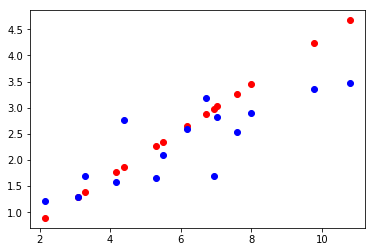

In [24]:
plt.plot(x_train.data.numpy(),y_pre.data.numpy(),"ro")
plt.plot(x_train.data.numpy(),y_train.data.numpy(),"bo")

### 一元线性回归，框架建模

In [54]:
from torch import nn,optim

In [55]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [56]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [57]:
class LinerRregression(nn.Module):
    def __init__(self):
        super(LinerRregression,self).__init__()
        self.linear = nn.Linear(1,1)        #input and output is 1 dimension输入和输出为1维
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [187]:
if torch.cuda.is_available():
    model = LinerRregression().cuda()
else:
    model = LinerRregression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr = 1e-3)
for parameters in model.parameters():
    print(parameters)

Parameter containing:
tensor([[-0.8935]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.5017], device='cuda:0', requires_grad=True)


In [60]:
num_epochs = 1000
if torch.cuda.is_available():
        inputs = Variable(x_train).cuda()
        targets = Variable(y_train).cuda()
else:
    inputs = Variable(x_train)
    targets = Variable(y_train)
for epoch in range(num_epochs):
    # 前向传播
    out = model(inputs)
    loss = criterion(out,targets)
    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 20 ==0:
        print(loss)

tensor(15.1479, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.5744, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1819, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1713, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1710, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1709, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1709, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1709, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1709, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1709, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1708, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1708, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1708, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1708, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1708, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1707, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.1707, device='cuda:0', grad_fn=<MseLossBackwar

torch.Size([15, 1])
tensor([3.3000])
tensor([1.7000])


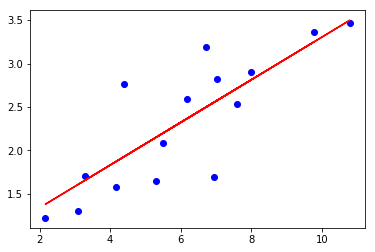

In [76]:
out = model(inputs)
print(out.shape)
# print(targets)
print(x_train[0])
print(y_train[0])
plt.plot(x_train.numpy(),y_train.numpy(),"bo")
plt.plot(x_train.numpy(),out.cpu().detach().numpy(),"r-")

### 多元线性----底层建模

In [77]:
# 定义一个多变量函数

w_target = np.array([0.5, 3, 2.4]) # 定义参数
b_target = np.array([0.9]) # 定义参数

f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(
    b_target[0], w_target[0], w_target[1], w_target[2]) # 打印出函数的式子

print(f_des)

y = 0.90 + 0.50 * x + 3.00 * x^2 + 2.40 * x^3


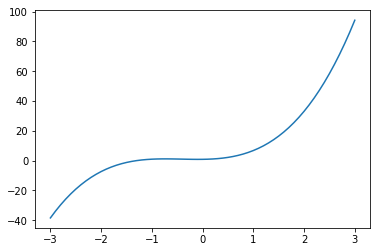

In [123]:
x_sample = np.arange(-3, 3.1, 0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[1] * x_sample ** 2 + w_target[2] * x_sample ** 3
plt.plot(x_sample,y_sample)

In [124]:
# 构建数据 x 和 y
# x 是一个如下矩阵 [x, x^2, x^3]
# y 是函数的结果 [y]

x_train = np.stack([x_sample ** i for i in range(1, 4)], axis=1)
x_train = torch.from_numpy(x_train).float() # 转换成 float tensor
y_train = torch.from_numpy(y_sample).float().unsqueeze(1) # 转化成 float tensor 
print(y_train.size())

torch.Size([61, 1])


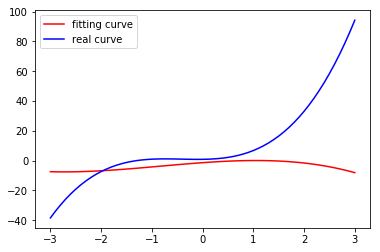

In [125]:
w = Variable(torch.randn(3,1),requires_grad=True)
b = Variable(torch.randn(1),requires_grad=True)
# 将原始数据转成variable格式
x_train = Variable(x_train)
y_train = Variable(y_train)
# 定义一个函数
def multi_liner(x_train):
    return torch.mm(x_train,w)+b
# 前向传播
y_pred = multi_liner(x_train)

# 画出第一次结果
plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_train.data.numpy(), label='real curve', color='b')
plt.legend()

tensor(952.5298, grad_fn=<MeanBackward0>)
tensor(660.2258, grad_fn=<MeanBackward0>)


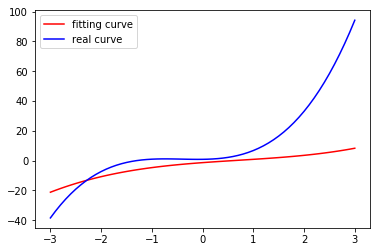

In [126]:
loss = loss_fun(y_pred,y_train)
print(loss)
# 反向传播
rl = 1e-3
loss.backward()
w.data = w.data - rl*w.grad
b.data = b.data - rl*b.grad
w.grad.data.zero_()
b.grad.data.zero_()
y_pred = multi_liner(x_train)
# 第二次预测
plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_train.data.numpy(), label='real curve', color='b')
plt.legend()
loss = loss_fun(y_pred,y_train)
print(loss)

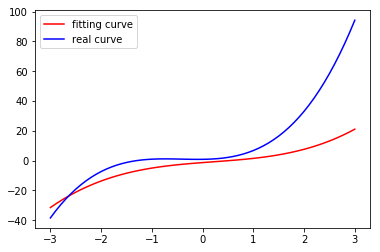

In [127]:
loss.backward()
w.data = w.data - rl*w.grad
b.data = b.data - rl*b.grad
w.grad.data.zero_()
b.grad.data.zero_()
y_pred = multi_liner(x_train)
plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_train.data.numpy(), label='real curve', color='b')
plt.legend()

In [129]:
# 循环1000次迭代
epoch = 1000
for i in range(epoch):
    # 前向传播
    y_pred = multi_liner(x_train)
    loss = loss_fun(y_pred,y_train)
    # 反向传播
    loss.backward()
    w.data = w.data - rl*w.grad
    b.data = b.data - rl*b.grad
    w.grad.data.zero_()
    b.grad.data.zero_()
    if epoch % 40 == 0:
        print(loss)

tensor(481.9824, grad_fn=<MeanBackward0>)
tensor(371.0221, grad_fn=<MeanBackward0>)
tensor(299.9205, grad_fn=<MeanBackward0>)
tensor(252.5874, grad_fn=<MeanBackward0>)
tensor(219.5714, grad_fn=<MeanBackward0>)
tensor(195.3101, grad_fn=<MeanBackward0>)
tensor(176.5208, grad_fn=<MeanBackward0>)
tensor(161.2569, grad_fn=<MeanBackward0>)
tensor(148.3561, grad_fn=<MeanBackward0>)
tensor(137.1169, grad_fn=<MeanBackward0>)
tensor(127.1091, grad_fn=<MeanBackward0>)
tensor(118.0625, grad_fn=<MeanBackward0>)
tensor(109.8022, grad_fn=<MeanBackward0>)
tensor(102.2101, grad_fn=<MeanBackward0>)
tensor(95.2023, grad_fn=<MeanBackward0>)
tensor(88.7163, grad_fn=<MeanBackward0>)
tensor(82.7029, grad_fn=<MeanBackward0>)
tensor(77.1215, grad_fn=<MeanBackward0>)
tensor(71.9373, grad_fn=<MeanBackward0>)
tensor(67.1201, grad_fn=<MeanBackward0>)
tensor(62.6426, grad_fn=<MeanBackward0>)
tensor(58.4801, grad_fn=<MeanBackward0>)
tensor(54.6099, grad_fn=<MeanBackward0>)
tensor(51.0113, grad_fn=<MeanBackward0>)
te

tensor(2.1442, grad_fn=<MeanBackward0>)
tensor(2.1402, grad_fn=<MeanBackward0>)
tensor(2.1362, grad_fn=<MeanBackward0>)
tensor(2.1322, grad_fn=<MeanBackward0>)
tensor(2.1282, grad_fn=<MeanBackward0>)
tensor(2.1242, grad_fn=<MeanBackward0>)
tensor(2.1202, grad_fn=<MeanBackward0>)
tensor(2.1163, grad_fn=<MeanBackward0>)
tensor(2.1123, grad_fn=<MeanBackward0>)
tensor(2.1084, grad_fn=<MeanBackward0>)
tensor(2.1044, grad_fn=<MeanBackward0>)
tensor(2.1005, grad_fn=<MeanBackward0>)
tensor(2.0966, grad_fn=<MeanBackward0>)
tensor(2.0926, grad_fn=<MeanBackward0>)
tensor(2.0887, grad_fn=<MeanBackward0>)
tensor(2.0848, grad_fn=<MeanBackward0>)
tensor(2.0809, grad_fn=<MeanBackward0>)
tensor(2.0770, grad_fn=<MeanBackward0>)
tensor(2.0731, grad_fn=<MeanBackward0>)
tensor(2.0692, grad_fn=<MeanBackward0>)
tensor(2.0654, grad_fn=<MeanBackward0>)
tensor(2.0615, grad_fn=<MeanBackward0>)
tensor(2.0576, grad_fn=<MeanBackward0>)
tensor(2.0538, grad_fn=<MeanBackward0>)
tensor(2.0499, grad_fn=<MeanBackward0>)


tensor(1.2183, grad_fn=<MeanBackward0>)
tensor(1.2160, grad_fn=<MeanBackward0>)
tensor(1.2137, grad_fn=<MeanBackward0>)
tensor(1.2115, grad_fn=<MeanBackward0>)
tensor(1.2092, grad_fn=<MeanBackward0>)
tensor(1.2069, grad_fn=<MeanBackward0>)
tensor(1.2047, grad_fn=<MeanBackward0>)
tensor(1.2024, grad_fn=<MeanBackward0>)
tensor(1.2002, grad_fn=<MeanBackward0>)
tensor(1.1979, grad_fn=<MeanBackward0>)
tensor(1.1957, grad_fn=<MeanBackward0>)
tensor(1.1935, grad_fn=<MeanBackward0>)
tensor(1.1912, grad_fn=<MeanBackward0>)
tensor(1.1890, grad_fn=<MeanBackward0>)
tensor(1.1868, grad_fn=<MeanBackward0>)
tensor(1.1846, grad_fn=<MeanBackward0>)
tensor(1.1824, grad_fn=<MeanBackward0>)
tensor(1.1802, grad_fn=<MeanBackward0>)
tensor(1.1779, grad_fn=<MeanBackward0>)
tensor(1.1757, grad_fn=<MeanBackward0>)
tensor(1.1736, grad_fn=<MeanBackward0>)
tensor(1.1714, grad_fn=<MeanBackward0>)
tensor(1.1692, grad_fn=<MeanBackward0>)
tensor(1.1670, grad_fn=<MeanBackward0>)
tensor(1.1648, grad_fn=<MeanBackward0>)


tensor(0.6941, grad_fn=<MeanBackward0>)
tensor(0.6928, grad_fn=<MeanBackward0>)
tensor(0.6915, grad_fn=<MeanBackward0>)
tensor(0.6902, grad_fn=<MeanBackward0>)
tensor(0.6890, grad_fn=<MeanBackward0>)
tensor(0.6877, grad_fn=<MeanBackward0>)
tensor(0.6864, grad_fn=<MeanBackward0>)
tensor(0.6851, grad_fn=<MeanBackward0>)
tensor(0.6838, grad_fn=<MeanBackward0>)
tensor(0.6825, grad_fn=<MeanBackward0>)
tensor(0.6813, grad_fn=<MeanBackward0>)
tensor(0.6800, grad_fn=<MeanBackward0>)
tensor(0.6787, grad_fn=<MeanBackward0>)
tensor(0.6775, grad_fn=<MeanBackward0>)
tensor(0.6762, grad_fn=<MeanBackward0>)
tensor(0.6749, grad_fn=<MeanBackward0>)
tensor(0.6737, grad_fn=<MeanBackward0>)
tensor(0.6724, grad_fn=<MeanBackward0>)
tensor(0.6712, grad_fn=<MeanBackward0>)
tensor(0.6699, grad_fn=<MeanBackward0>)
tensor(0.6687, grad_fn=<MeanBackward0>)
tensor(0.6674, grad_fn=<MeanBackward0>)
tensor(0.6662, grad_fn=<MeanBackward0>)
tensor(0.6649, grad_fn=<MeanBackward0>)
tensor(0.6637, grad_fn=<MeanBackward0>)


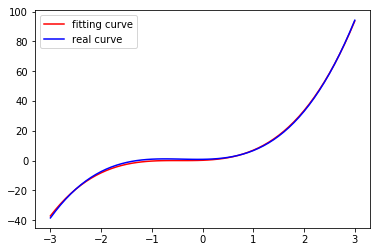

In [134]:
y_pred = multi_liner(x_train)
plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_train.data.numpy(), label='real curve', color='b')
plt.legend()

### 多元线性----框架建模

In [28]:
from torch import nn,optim
from torch.autograd import Variable
from matplotlib.pyplot import plot as plt
%matplotlib inline

tensor(85.9126, grad_fn=<MseLossBackward>)
tensor(83.3880, grad_fn=<MseLossBackward>)
tensor(80.9407, grad_fn=<MseLossBackward>)
tensor(78.5684, grad_fn=<MseLossBackward>)
tensor(76.2687, grad_fn=<MseLossBackward>)
tensor(74.0395, grad_fn=<MseLossBackward>)
tensor(71.8784, grad_fn=<MseLossBackward>)
tensor(69.7836, grad_fn=<MseLossBackward>)
tensor(67.7528, grad_fn=<MseLossBackward>)
tensor(65.7841, grad_fn=<MseLossBackward>)
tensor(63.8755, grad_fn=<MseLossBackward>)
tensor(62.0254, grad_fn=<MseLossBackward>)
tensor(60.2317, grad_fn=<MseLossBackward>)
tensor(58.4928, grad_fn=<MseLossBackward>)
tensor(56.8070, grad_fn=<MseLossBackward>)
tensor(55.1727, grad_fn=<MseLossBackward>)
tensor(53.5882, grad_fn=<MseLossBackward>)
tensor(52.0521, grad_fn=<MseLossBackward>)
tensor(50.5628, grad_fn=<MseLossBackward>)
tensor(49.1188, grad_fn=<MseLossBackward>)
tensor(47.7189, grad_fn=<MseLossBackward>)
tensor(46.3616, grad_fn=<MseLossBackward>)
tensor(45.0455, grad_fn=<MseLossBackward>)
tensor(43.7

tensor(0.9503, grad_fn=<MseLossBackward>)
tensor(0.9454, grad_fn=<MseLossBackward>)
tensor(0.9405, grad_fn=<MseLossBackward>)
tensor(0.9357, grad_fn=<MseLossBackward>)
tensor(0.9309, grad_fn=<MseLossBackward>)
tensor(0.9261, grad_fn=<MseLossBackward>)
tensor(0.9214, grad_fn=<MseLossBackward>)
tensor(0.9166, grad_fn=<MseLossBackward>)
tensor(0.9120, grad_fn=<MseLossBackward>)
tensor(0.9073, grad_fn=<MseLossBackward>)
tensor(0.9027, grad_fn=<MseLossBackward>)
tensor(0.8981, grad_fn=<MseLossBackward>)
tensor(0.8936, grad_fn=<MseLossBackward>)
tensor(0.8891, grad_fn=<MseLossBackward>)
tensor(0.8846, grad_fn=<MseLossBackward>)
tensor(0.8801, grad_fn=<MseLossBackward>)
tensor(0.8757, grad_fn=<MseLossBackward>)
tensor(0.8713, grad_fn=<MseLossBackward>)
tensor(0.8669, grad_fn=<MseLossBackward>)
tensor(0.8625, grad_fn=<MseLossBackward>)
tensor(0.8582, grad_fn=<MseLossBackward>)
tensor(0.8539, grad_fn=<MseLossBackward>)
tensor(0.8497, grad_fn=<MseLossBackward>)
tensor(0.8454, grad_fn=<MseLossBac

tensor(0.2666, grad_fn=<MseLossBackward>)
tensor(0.2656, grad_fn=<MseLossBackward>)
tensor(0.2647, grad_fn=<MseLossBackward>)
tensor(0.2638, grad_fn=<MseLossBackward>)
tensor(0.2629, grad_fn=<MseLossBackward>)
tensor(0.2621, grad_fn=<MseLossBackward>)
tensor(0.2612, grad_fn=<MseLossBackward>)
tensor(0.2603, grad_fn=<MseLossBackward>)
tensor(0.2594, grad_fn=<MseLossBackward>)
tensor(0.2585, grad_fn=<MseLossBackward>)
tensor(0.2577, grad_fn=<MseLossBackward>)
tensor(0.2568, grad_fn=<MseLossBackward>)
tensor(0.2559, grad_fn=<MseLossBackward>)
tensor(0.2551, grad_fn=<MseLossBackward>)
tensor(0.2542, grad_fn=<MseLossBackward>)
tensor(0.2534, grad_fn=<MseLossBackward>)
tensor(0.2525, grad_fn=<MseLossBackward>)
tensor(0.2517, grad_fn=<MseLossBackward>)
tensor(0.2508, grad_fn=<MseLossBackward>)
tensor(0.2500, grad_fn=<MseLossBackward>)
tensor(0.2492, grad_fn=<MseLossBackward>)
tensor(0.2484, grad_fn=<MseLossBackward>)
tensor(0.2475, grad_fn=<MseLossBackward>)
tensor(0.2467, grad_fn=<MseLossBac

tensor(0.1107, grad_fn=<MseLossBackward>)
tensor(0.1104, grad_fn=<MseLossBackward>)
tensor(0.1102, grad_fn=<MseLossBackward>)
tensor(0.1099, grad_fn=<MseLossBackward>)
tensor(0.1097, grad_fn=<MseLossBackward>)
tensor(0.1094, grad_fn=<MseLossBackward>)
tensor(0.1092, grad_fn=<MseLossBackward>)
tensor(0.1089, grad_fn=<MseLossBackward>)
tensor(0.1087, grad_fn=<MseLossBackward>)
tensor(0.1085, grad_fn=<MseLossBackward>)
tensor(0.1082, grad_fn=<MseLossBackward>)
tensor(0.1080, grad_fn=<MseLossBackward>)
tensor(0.1077, grad_fn=<MseLossBackward>)
tensor(0.1075, grad_fn=<MseLossBackward>)
tensor(0.1072, grad_fn=<MseLossBackward>)
tensor(0.1070, grad_fn=<MseLossBackward>)
tensor(0.1067, grad_fn=<MseLossBackward>)
tensor(0.1065, grad_fn=<MseLossBackward>)
tensor(0.1063, grad_fn=<MseLossBackward>)
tensor(0.1060, grad_fn=<MseLossBackward>)
tensor(0.1058, grad_fn=<MseLossBackward>)
tensor(0.1056, grad_fn=<MseLossBackward>)
tensor(0.1053, grad_fn=<MseLossBackward>)
tensor(0.1051, grad_fn=<MseLossBac

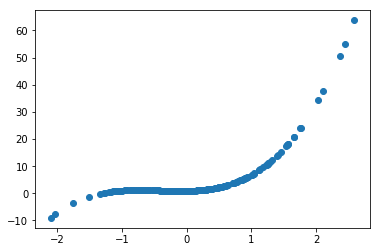

In [50]:
def make_feature(x):
    x = x.unsqueeze(1)
    return torch.cat([x ** i for i in range(1,4)],1)

# 定义真是函数
w_target = torch.FloatTensor([0.5,3,2.4]).unsqueeze(1)
b_target = torch.FloatTensor([0.9])

def f(x):
    return x.mm(w_target)+b_target[0]

def get_batch(batch_size = 200):
    random = torch.randn(batch_size)
    x = make_feature(random)
    y = f(x)
    return Variable(x),Variable(y)

class poly_model (nn.Module):
    def __init__(self):
        super(poly_model, self).__init__()
        self.poly = torch.nn.Linear(3,1)
        
    def forward(self,x):
        out = self.poly(x)
        return out
    
model = poly_model()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=1e-3)

batch_x,batch_y = get_batch()
plt.scatter(batch_x.data.numpy()[:,0],batch_y.data.numpy())

epoch = 1000
for i in range(epoch):
    
    # 前向传播
    output = model(batch_x)
    loss = criterion(output,batch_y)
    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(loss)
    
    

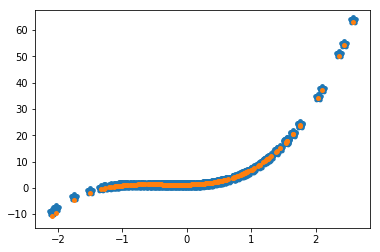

In [66]:
output = model(batch_x)
plt.scatter(batch_x.data.numpy()[:,0],batch_y.data.numpy(),marker="*",linewidths=5)
plt.scatter(batch_x.data.numpy()[:,0],output.data.numpy(),marker=".",linewidths=2)